In [1]:
import os
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.8/bin")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
from tensorflow.python.client import device_lib 
from keras.optimizers import Adam
from keras import backend as K
import tensorflow_addons.metrics as tfa_metrics


C:\Users\hojoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\hojoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFl

In [2]:
tf.__version__

'2.10.0'

In [3]:
trainX = np.load('trainX.npy').astype(float)
trainY = np.load('trainY.npy').astype(float)
testX = np.load('testX.npy').astype(float)
testY = np.load('testY.npy').astype(float)


In [4]:
trainX.shape

(7579, 25, 60)

In [5]:
epochs = 1
model = Sequential()
K.clear_session()



In [6]:
from keras.callbacks import EarlyStopping
from keras.layers import TimeDistributed
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Flatten

early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min', restore_best_weights=True)

model.add(LSTM(units=1024, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=512, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=optimizer,  metrics=['accuracy'] )

model.fit(trainX, trainY, batch_size=1, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

model.summary()

6821/6821 [==============================] - 94s 13ms/step - loss: 0.6767 - accuracy: 0.5699 - val_loss: 0.6467 - val_accuracy: 0.6188
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 1024)          4444160   
                                                                 
 dropout (Dropout)           (None, 25, 1024)          0         
                                                                 
 lstm_1 (LSTM)               (None, 25, 512)           3147776   
                                                                 
 dropout_1 (Dropout)         (None, 25, 512)           0         
                                                                 
 lstm_2 (LSTM)               (None, 25, 256)           787456    
                                                                 
 dropout_2 (Dropout)         (None, 25, 256)         

In [8]:
print(model.evaluate(testX, testY))


60/60 [==============================] - 2s 11ms/step - loss: 0.6521 - accuracy: 0.6084
[0.6521334648132324, 0.6083588600158691]


60/60 [==============================] - 1s 12ms/step


ValueError: x and y must have same first dimension, but have shapes (30,) and (25, 1)

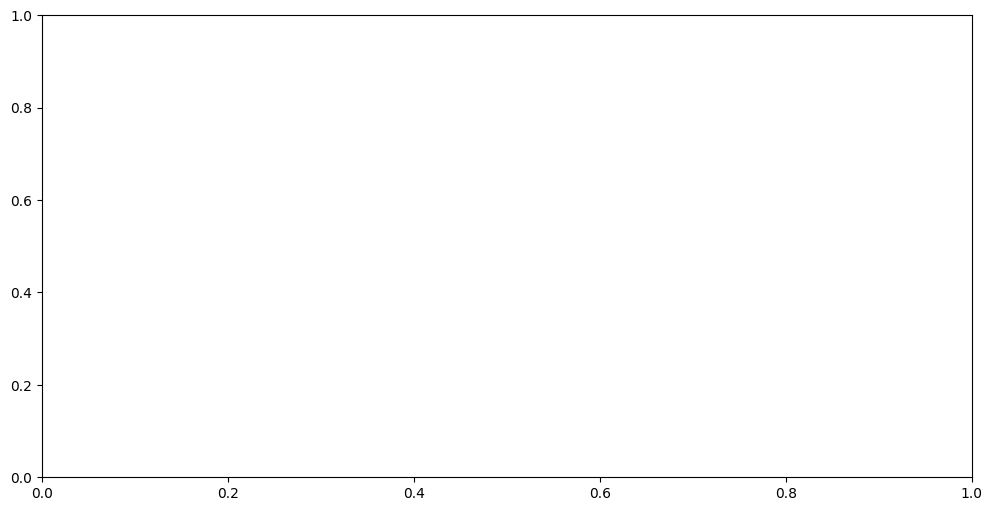

In [41]:
y_hat = model.predict(testX)
a_axis = np.arange(0, 25)
y_hat = y_hat[5,:,:] # 6번째 경기의 결과값
plt.figure(figsize=(12, 6))
plt.plot(a_axis, y_hat, 'o-', label = 'Blue Win', color = 'blue')
plt.plot(a_axis,[1 - x for x in y_hat] , 'o-', label = 'Red Win', color = 'red')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
import numpy as np
a_axis = np.arange(0, 25)
prediction_per_minute_mean = None
for i in range(len(testY)):
    if testY[i][0] == 1:
        if prediction_per_minute_mean is None:
            prediction_per_minute_mean = y_hat[i].reshape(1, 25, 1)
        else:
            prediction_per_minute_mean = np.vstack((prediction_per_minute_mean, y_hat[i].reshape(1, 25, 1)))
prediction_per_minute_mean = prediction_per_minute_mean.mean(axis=0)
plt.figure(figsize=(12, 6))
plt.plot(a_axis, prediction_per_minute_mean, 'o-', label='Blue Win', color='blue')
plt.plot(a_axis, [1 - x for x in prediction_per_minute_mean], 'o-', label='Red Win', color='red')
plt.ylim(0, 1)
plt.legend()
plt.show()



ValueError: cannot reshape array of size 1 into shape (1,25,1)